The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November.

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
Ozone - COPERNICUS/S5P/NRTI/L3_O3
Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD
Important: Please only use the data provided for this challenge as part of your modeling effort. Do not use any external data, including any data from Sentinel-5P not provided on this page.

In [1]:
# required libraries
import pandas as pd 
import  numpy as np


In [2]:
# display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


## Data Cleaning

In [3]:
# load and read the dataset into a DataFrame

train_path = '/Users/kofi/Desktop/Portfolio/Datasets/Co2 prediction Rwanda/train.csv'
test_path ='/Users/kofi/Desktop/Portfolio/Datasets/Co2 prediction Rwanda/test.csv'
submission_path = '/Users/kofi/Desktop/Portfolio/Datasets/Co2 prediction Rwanda/sample_submission.csv'


In [4]:
# read the train data into a DataFrame
train = pd.read_csv(train_path)

train.tail(3)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030098,1967.424136,2470.528304,829859.062500,71.694785,47.004614,-142.806373,26.133751,0.000043,0.000003,0.000039,0.000100,8613.468845,-0.366031,0.187802,830419.335612,-99.851492,39.123617,-128.051809,34.959241,-0.000069,1.304604,-0.000145,0.350748,34.964802,-128.066071,39.123631,-99.850349,-0.855705,830174.000296,-0.346926,35.359190,-134.750981,30.712761,0.114637,2.571747,0.299005,229.407711,0.846234,-0.346926,35.359190,-134.750981,30.712761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.862779,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,-129.573396,33.906037,-0.000015,0.031012,3394.020508,3911.986206,830346.093750,-97.630821,32.627596,-129.550014,33.910437,0.000049,0.000010,0.000039,0.000111,8613.471852,-0.596050,0.045697,830375.349911,-100.344827,32.599393,-129.573396,33.906037,0.000080,1.222815,0.000042,0.184209,33.906037,-129.573396,32.599393,-100.344827,-1.232358,830032.493363,8.424284,48.277884,-139.470709,29.120306,0.111553,2.824461,0.319145,229.638952,0.792553,8.424281,48.277876,-139.470727,29.120322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792255,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792
79022,ID_-3.299_30.301_2021_52,-3.299,30.3

In [5]:
#read the test data into a DataFrame
test = pd.read_csv(test_path)
test.head(3)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.00000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,0.000011,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.1250,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.07987,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,0.000017,0.000038,0.000109,8613.426417,-

In [6]:
# read into DataFrame
submission = pd.read_csv(submission_path)
submission.head(3)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94
2,ID_-0.510_29.290_2022_02,81.94


In [7]:
#shape and size of the train,test and submission datasets

train.shape,test.shape,submission.shape

((79023, 76), (24353, 75), (24353, 2))

In [8]:
# Concise summary of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [9]:
# drop column with string values. Thus: data type = object

train.drop(columns='ID_LAT_LON_YEAR_WEEK',axis=1, inplace =True)

In [10]:
# Summary of the dataset using discriptive statistics

train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
latitude,79023.0,-1.891072,0.694522,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,79023.0,29.880155,0.810375,28.228000,29.262000,29.883000,30.471000,31.532000
year,79023.0,2020.000000,0.816502,2019.000000,2019.000000,2020.000000,2021.000000,2021.000000
week_no,79023.0,26.000000,15.297155,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,64414.0,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191


In [11]:
# counts of missing values and their respective percentage values

missing_value = train.isnull().sum().sort_values(ascending=False)

percent_missing = (missing_value/len(train))*100

#round percentage values to one decimal place

percent_missing = percent_missing.round(1)

#create a DataFrame for the missing info
missing_info = pd.DataFrame({'missing_value':missing_value,'percent_missing':percent_missing})

missing_info.head(10)


,missing_value,percent_missing
UvAerosolLayerHeight_aerosol_height,78584,99.4
UvAerosolLayerHeight_sensor_azimuth_angle,78584,99.4
UvAerosolLayerHeight_aerosol_pressure,78584,99.4
UvAerosolLayerHeight_aerosol_optical_depth,78584,99.4
UvAerosolLayerHeight_sensor_zenith_angle,78584,99.4
UvAerosolLayerHeight_solar_zenith_angle,78584,99.4
UvAerosolLayerHeight_solar_azimuth_angle,78584,99.4
NitrogenDioxide_solar_zenith_angle,18320,23.2
NitrogenDioxide_absorbing_aerosol_index,18320,23.2
NitrogenDioxide_tropopause_pressure,18320,23.2


In [12]:
# drop columns with missing percentage greater than 99 percent

train.drop(['UvAerosolLayerHeight_aerosol_height','UvAerosolLayerHeight_solar_zenith_angle','UvAerosolLayerHeight_solar_azimuth_angle',
'UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_aerosol_pressure','UvAerosolLayerHeight_aerosol_optical_depth',
'UvAerosolLayerHeight_sensor_zenith_angle'],axis=1,inplace=True)

# reset the index

train.reset_index(drop=True, inplace=True)

In [13]:
# updated size and shape of the train dataset
train.shape

(79023, 68)

In [14]:
# predict the missing values using KNNImputer
from sklearn.impute import KNNImputer

# create imputer instance
imputer = KNNImputer(n_neighbors = 3)

imputer.fit(train)

imputed_df = imputer.transform(train)


train_df = pd.DataFrame(imputed_df, columns=train.columns)

In [15]:
t_missing =train_df.isnull().sum().sum()
    
print("Total missing values are :", t_missing)

Total missing values are : 0


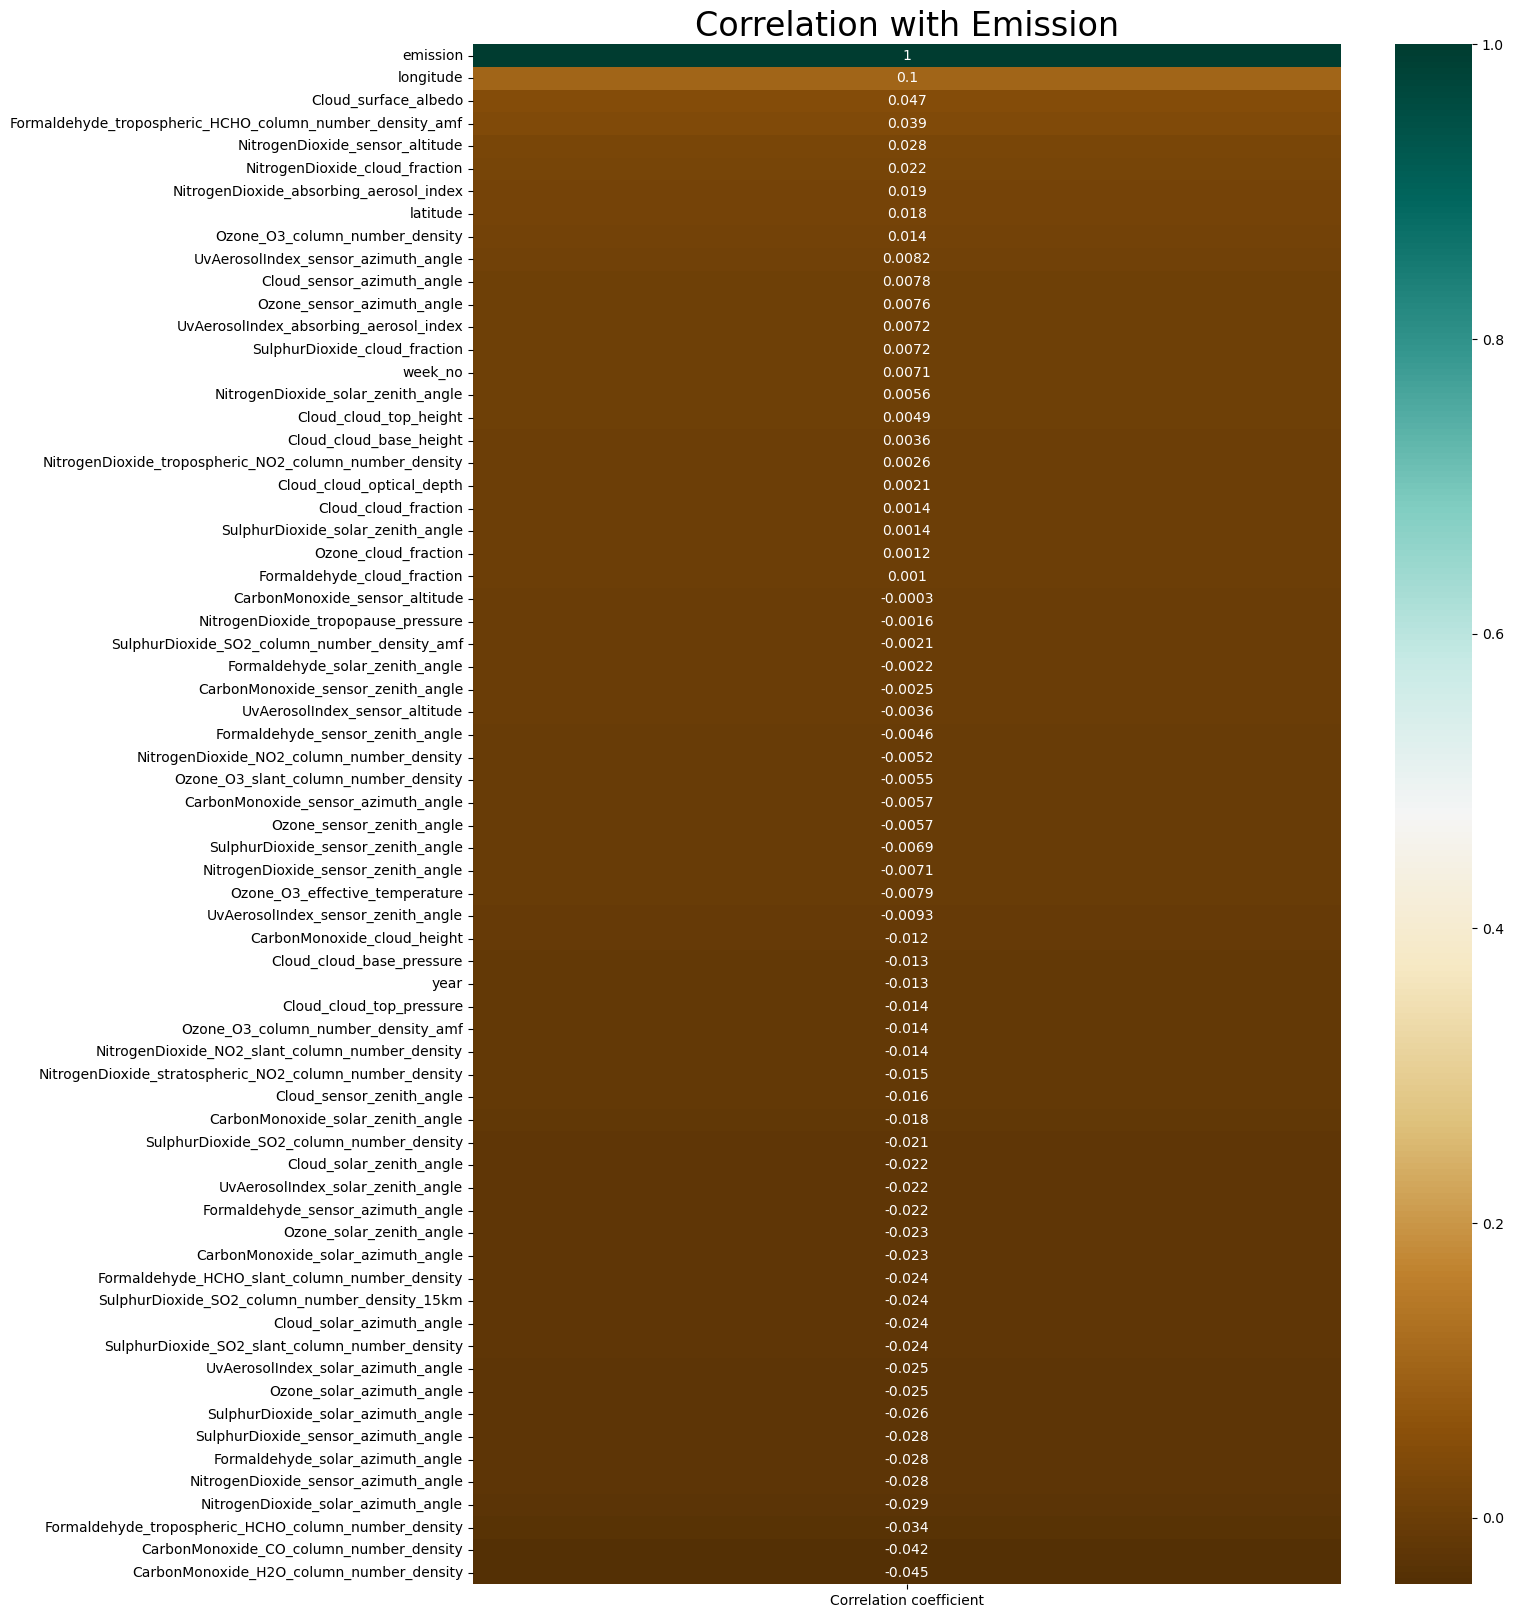

In [16]:
import matplotlib.pyplot as plt

import seaborn as sns


# Calculate the correlation between 'emission' and other variables 
corr_emission = train_df.corr()['emission'].sort_values(ascending=False)

# Create a DataFrame containing the correlated values
train_df_corr = pd.DataFrame(corr_emission)

# Assign a new column name to the DataFrame
train_df_corr.columns = ['Correlation coefficient']


# Plot the correlation values as a heatmap
plt.figure(figsize=(14, 20))
sns.heatmap(train_df_corr, annot=True, cmap='BrBG')
plt.title('Correlation with Emission',fontsize=24)
plt.show()

In [17]:
# select features that correlate positively with emission for training

train_features = train_df[['latitude','longitude','week_no','SulphurDioxide_cloud_fraction','SulphurDioxide_solar_zenith_angle',
       'NitrogenDioxide_tropospheric_NO2_column_number_density','NitrogenDioxide_absorbing_aerosol_index','NitrogenDioxide_cloud_fraction', 
       'NitrogenDioxide_sensor_altitude','NitrogenDioxide_solar_zenith_angle','Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'UvAerosolIndex_absorbing_aerosol_index','UvAerosolIndex_sensor_azimuth_angle','Ozone_O3_column_number_density','Ozone_cloud_fraction',
       'Ozone_sensor_azimuth_angle','Cloud_cloud_fraction','Cloud_cloud_optical_depth','Cloud_cloud_base_height','Cloud_cloud_top_height',
       'Cloud_sensor_azimuth_angle','Cloud_surface_albedo','emission']] 


In [18]:
# print out few rows of the selected dataset 
train_features.head(3)


,latitude,longitude,week_no,SulphurDioxide_cloud_fraction,SulphurDioxide_solar_zenith_angle,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density_amf,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_azimuth_angle,Ozone_O3_column_number_density,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Cloud_cloud_fraction,Cloud_cloud_optical_depth,Cloud_cloud_base_height,Cloud_cloud_top_height,Cloud_sensor_azimuth_angle,Cloud_surface_albedo,emission
0,-0.51,29.29,0.0,0.255668,35.874496,1.211931e-05,-1.420709,0.122917,830102.049585,31.348719,0.863230,-1.280761,-12.628979,0.115927,0.595473,-12.628979,0.595473,15.568533,2615.120483,3664.436218,-12.628986,0.272292,3.750994
1,-0.51,29.29,1.0,0.130988,28.965133,1.639765e-05,-1.935386,0.067038,829859.960368,30.054262,1.172826,-1.548119,16.152492,0.116775,0.175166,24.464335,0.213608,8.690601,3174.572424,3651.190311,30.359375,0.256830,4.025176
2,-0.51,29.29,2.0,0.110018,23.206415,4.267369e-07,-2.754374,0.072135,829527.125000,23.206415,1.175467,-1.038673,-41.557633,0.117039,0.606091,-41.557633,0.703540,21.103410,3516.282669,4216.986492,15.377883,0.251101,4.231381


In [19]:
#required libraries

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# split the dataset into features (X) and target variable (y)

X = train_features.drop ('emission',axis=1)

y= train_features['emission']


# standardize the data in X

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [20]:
# split the data into training set and testing test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=5)

# size and shape of the training set and testing set

print('Training set for X-data: ',X_train.shape,'and Training set for y-data: ',y_train.shape)
print('Test set for X-data: ',X_test.shape,'and Test set for y-data: ',y_test.shape)

Training set for X-data:  (63218, 22) and Training set for y-data:  (63218,)
Test set for X-data:  (15805, 22) and Test set for y-data:  (15805,)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=111, max_depth=33, min_samples_split=6, random_state=8)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')


Mean Squared Error: 640.71
R-squared: 0.97


## Retrain the model on the entire train data

In [22]:

# split the dataset into features (X) and target variable (y)

X = train_df.drop ('emission',axis=1)

y= train_df['emission']


# standardize the data in X

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


# split the data into training set and testing test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=5)


# size and shape of the training set and testing set

print('Training set for X-data: ',X_train.shape,'and Training set for y-data: ',y_train.shape)
print('Test set for X-data: ',X_test.shape,'and Test set for y-data: ',y_test.shape)


Training set for X-data:  (63218, 67) and Training set for y-data:  (63218,)
Test set for X-data:  (15805, 67) and Test set for y-data:  (15805,)


In [23]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=111, max_depth=33, min_samples_split=6, random_state=8)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

Mean Squared Error: 614.89
R-squared: 0.97


In [35]:
# now lets read the test data into a DataFrame
test = pd.read_csv(test_path)
test.head(3)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.00000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,0.000011,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.1250,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.07987,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,0.000017,0.000038,0.000109,8613.426417,-

In [36]:
# drop columns that showed 99 percent missing values in the train data

test.drop(['UvAerosolLayerHeight_aerosol_height','UvAerosolLayerHeight_solar_zenith_angle','UvAerosolLayerHeight_solar_azimuth_angle',
'UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_aerosol_pressure','UvAerosolLayerHeight_aerosol_optical_depth',
'UvAerosolLayerHeight_sensor_zenith_angle'],axis=1,inplace=True)

# reset the index

test.reset_index(drop=True, inplace=True)

In [37]:
test.shape

(24353, 68)

In [38]:
# drop the columns with dtype object since not compatible with KNN imputer

test_data = test.drop(columns='ID_LAT_LON_YEAR_WEEK',axis=1,inplace=False)

from sklearn.impute import KNNImputer

# create imputer instance
imputer = KNNImputer(n_neighbors = 3)

imputer.fit(test_data)

imputed_df = imputer.transform(test_data)


test_df = pd.DataFrame(imputed_df, columns=test_data.columns)

In [39]:
# verification of missing values 

test_missing = test_df.isnull().sum().sum()

print('Total missing values in the test data are : ', test_missing)

Total missing values in the test data are :  0


In [40]:
test_df.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.51,29.29,2022.0,0.0,-0.000004,0.651557,0.000010,0.111397,-12.414861,32.228512,-128.186546,26.389980,0.000002,0.036094,2156.898279,2896.933561,829953.579732,-49.998910,37.322501,-102.619837,31.498397,0.000051,1.526653e-05,0.000035,0.000097,9900.064002,-0.487466,0.064244,829900.871529,-12.414861,32.228512,-128.186546,26.389980,0.000260,0.968584,0.000184,0.158418,27.247596,-126.913036,34.590733,-21.895270,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,-0.51,29.29,2022.0,1.0,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,-0.51,29.29,2022.0,2.0,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8613.426417,-0.008104,0.036490,829922.562500,-99.816841,36.693165,-131.658058,32.784893,0.000277,0.764546,0.000151,0.225136,27.418839,-143.602313,47.325487,3.650128,-1.034709,829642.01

In [41]:
test_df.shape

(24353, 67)

In [42]:
# standardize the data in test_df

transform = preprocessing.StandardScaler()
X = transform.fit_transform(test_df)

In [57]:
# Now, predict on the test data (best_test)
y_predict = model.predict(test_df)

#Print the first 10 predicted CO2 emission
print("\nPredicted CO2 Emission:\n")

for emission in y_predict[:15]:
   print(f"{emission:.2f}")



Predicted CO2 Emission:

5.81
5.82
5.82
5.78
5.78
5.82
5.77
5.80
5.79
5.76
5.75
5.85
5.77
5.77
5.81


/Users/kofi/Desktop/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [61]:
# submission file

submission = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test['ID_LAT_LON_YEAR_WEEK'], 'emission': y_predict})
submission['emission'] = submission['emission'].apply(lambda x: f'{x:.2f}')
submission.head()


,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,5.81
1,ID_-0.510_29.290_2022_01,5.82
2,ID_-0.510_29.290_2022_02,5.82
3,ID_-0.510_29.290_2022_03,5.78
4,ID_-0.510_29.290_2022_04,5.78


In [64]:
#save dataframe to a csv file
submission.to_csv('co2_emission_rwanda.csv', index = False)